In [1]:
import numpy as np
import networkx as nx

In [2]:
def random_walk(n):
    return [np.random.randint(0,11) for _ in range(n)]

def height_in_3tree(walk):
    height = 0
    
    for step in walk:
        if step % 3 == 0 and height > 0:
            height -= 1
        else:
            height += 1
    
    return height

def walk_goes_higher_than(d, walk):
    return height_in_3tree(walk) > d

In [3]:
def UGW(degs, probs, height):
    normalization = sum([ d * p for d, p in zip(degs, probs) ])
    offspring_probs = [ d * p / normalization for d, p in zip(degs, probs) ]
    
    T = nx.Graph()
    T.add_node('')
    
    root_deg = np.random.choice(degs, p=probs)
    current_level = [ str(i) for i in range(root_deg) ]
    T.add_edges_from([ ('', v) for v in current_level ])
    
    current_height = 1
    while current_height <= height:
        next_level = []
        
        for v in current_level:
            v_deg = np.random.choice(degs, p=offspring_probs)
            new_nodes = [ v + str(i) for i in range(1, v_deg)]
            next_level.extend(new_nodes)
            T.add_edges_from([ (v, u) for u in new_nodes ])
        
        current_level = next_level
        current_height += 1
    
    return T

In [4]:
def walk_in_tree(walk, tree):
    current_node = ''
    
    for step in walk:
        reduced_step = step % tree.degree[current_node]
            
        if reduced_step == 0 and current_node != '':
            next_node = current_node[:-1]
        else:
            next_node = current_node + str(reduced_step)
        
        current_node = next_node
    
    return current_node

In [25]:
def ball(graph, root, radius):
    b = nx.Graph()
    b.add_edges_from(nx.bfs_edges(graph, root, depth_limit=radius))
    b.nodes[root]['root'] = True
    return b

In [32]:
w = random_walk(3)
w

[9, 4, 10]

In [35]:
walk_in_tree(w, t)

'011'

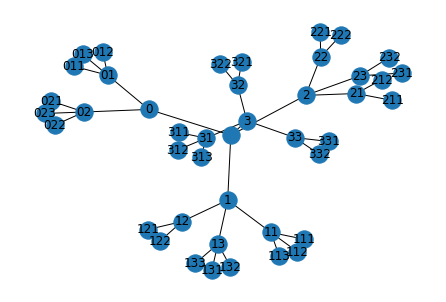

In [9]:
t = UGW([3,4],[0.5,0.5],2)
nx.draw(t, with_labels=True)

In [21]:
t.nodes['311']['root'] = True
t.nodes['311']

{'root': True}

{'root': True}

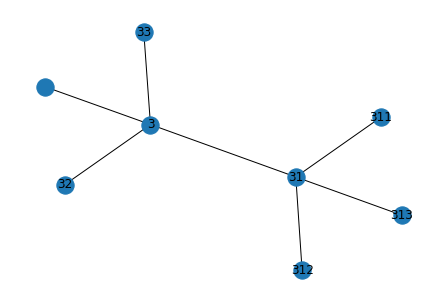

In [27]:
g = ball(t,'311',3)
nx.draw(g, with_labels=True)
g.nodes['311']

In [22]:
for node in g:
    print(node)

312
31
3
311
313
